In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [49]:
#Create a path
path = r'C:\Users\manny\Documents\Instacart Basket Analysis 05-01-2023'

In [50]:
#import dataframe -ords_prods_merge
ords_prods_merge= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_aggregated.pkl'))

<Axes: >

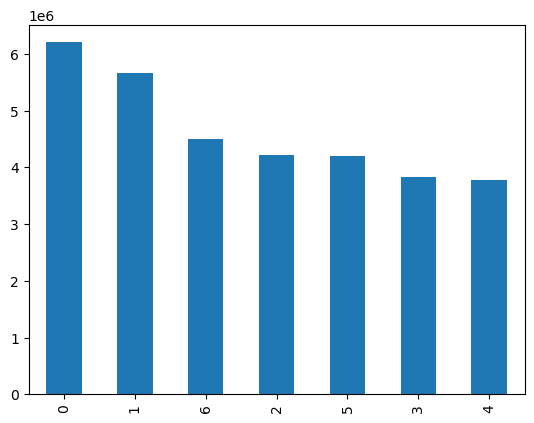

In [51]:
#BAR CHART
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

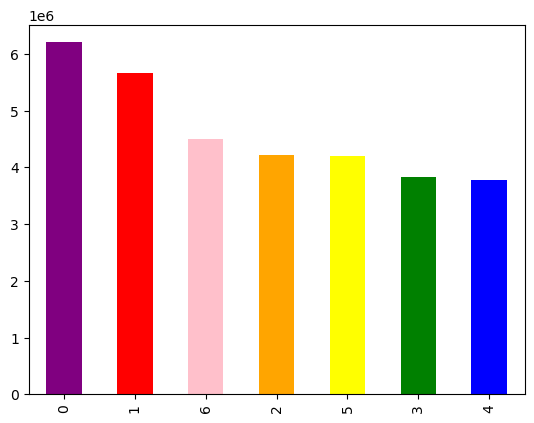

In [52]:
#BAR CHART W/ COLOR
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

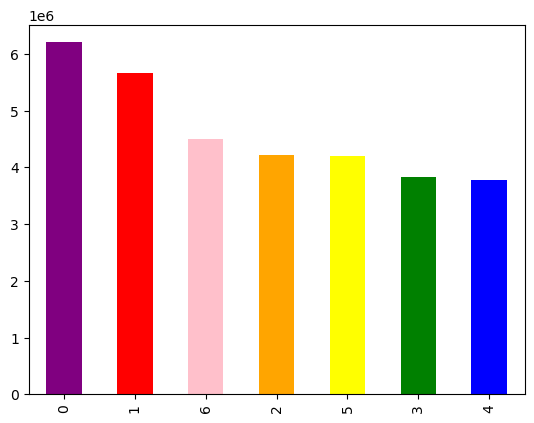

In [53]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [54]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

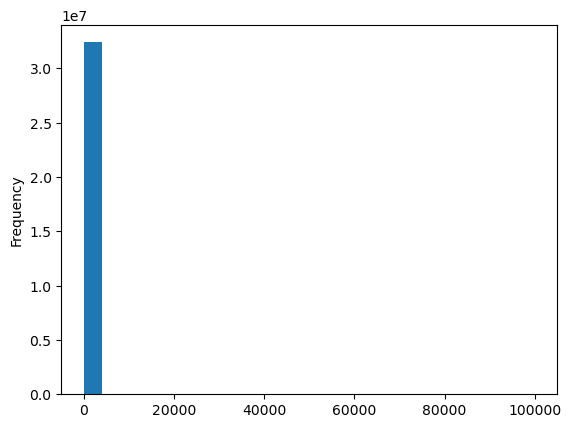

In [55]:
#Histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [56]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [57]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [58]:
ords_prods_merge['prices'].median()

7.4

In [59]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

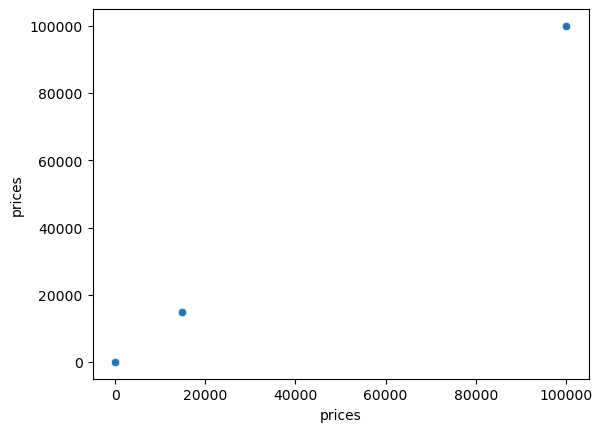

In [61]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [60]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,department_id,prices,_merge,max_order,loyalty_flag,avg_ord_prices,spending_flag,median_days_since_prior_order,med_freq,customer_frequency
10030345,171,171,912404,17,12,2,14,5.0,21553,5,...,16,14900.0,both,40,regular_customer,108.648299,high_spender,5.0,5.0,frequent_customer
10030346,181,181,603376,17,22,6,16,4.0,21553,3,...,16,14900.0,both,40,regular_customer,108.648299,high_spender,5.0,5.0,frequent_customer
10030347,1944,1944,3264360,135,2,2,21,13.0,21553,6,...,16,14900.0,both,4,new_customer,1154.792308,high_spender,12.0,12.0,regular_customer
10030348,1945,1945,892534,135,3,0,8,12.0,21553,3,...,16,14900.0,both,4,new_customer,1154.792308,high_spender,12.0,12.0,regular_customer
10030349,5708,5708,229704,342,8,1,19,30.0,21553,9,...,16,14900.0,both,16,regular_customer,114.426619,high_spender,23.0,23.0,non-frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,3386542,2249946,204099,29,0,8,4.0,33664,1,...,16,99999.0,both,39,regular_customer,1106.743956,high_spender,4.0,4.0,frequent_customer
29166210,3386544,3386544,2363282,204099,31,0,9,2.0,33664,1,...,16,99999.0,both,39,regular_customer,1106.743956,high_spender,4.0,4.0,frequent_customer
29166211,3391313,3391313,3181945,204395,13,3,15,8.0,33664,25,...,16,99999.0,both,15,regular_customer,451.153540,high_spender,5.0,5.0,frequent_customer
29166212,3405096,3405096,2486215,205227,7,3,20,4.0,33664,8,...,16,99999.0,both,12,regular_customer,1178.381871,high_spender,12.0,12.0,regular_customer


In [62]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [63]:
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

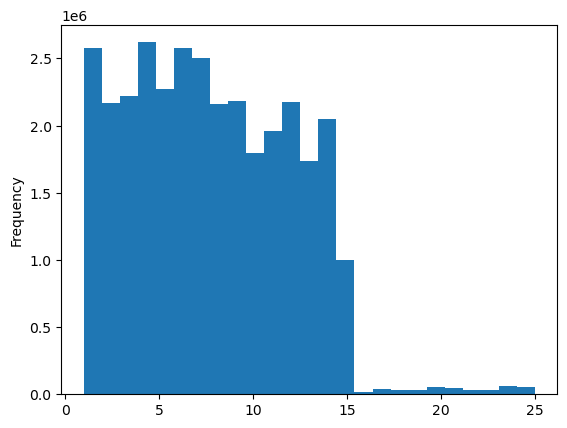

In [64]:
#Histogram ver 2
ords_prods_merge['prices'].plot.hist(bins = 25)

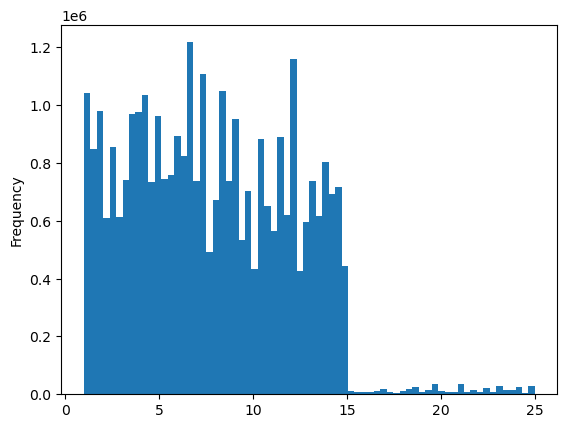

In [66]:
#Histogram with increased granularity
hist=ords_prods_merge['prices'].plot.hist(bins = 70)

In [67]:
# Export hist
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [70]:
#Create subset
df = ords_prods_merge[:2000000]

In [76]:
#Sampling
np.random.seed(4)

#List of T/F values to test np.random.rand()<=0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [72]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [77]:
#Store 70% of sample in df big
big = ords_prods_merge[dev]

In [78]:
#Store 30% of sample in df big
small = ords_prods_merge[~dev]

In [79]:
#check lengths
len(ords_prods_merge)

32404859

In [80]:
len(big) + len(small)

32404859

In [81]:
df_2 = small[['orders_day_of_week','prices']]

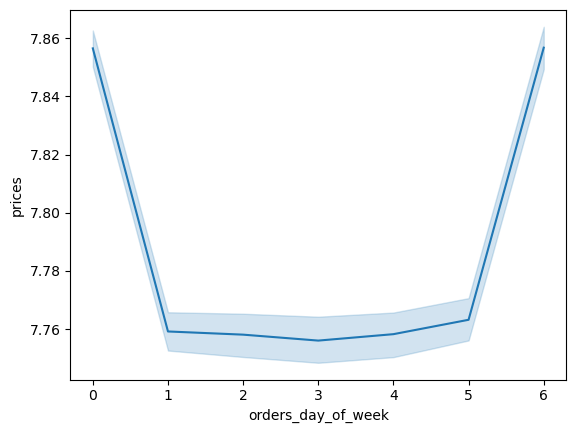

In [82]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [84]:
#Accuracy check
df_3 = big[['orders_day_of_week','prices']]

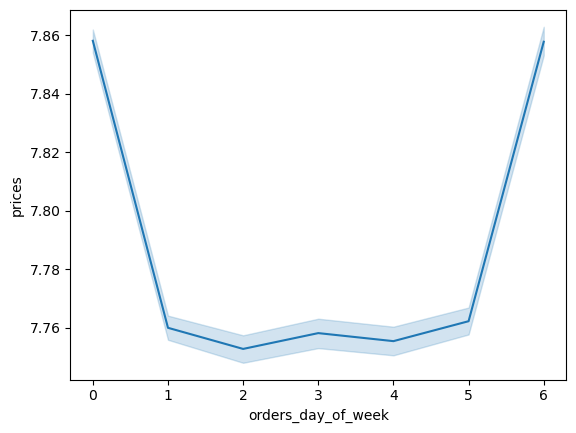

In [85]:
line = sns.lineplot(data = df_3, x = 'orders_day_of_week',y = 'prices')